#  Deber: Criptografía Clásica (Ciberseguridad
**Codigo Banner:** 00326682  
**Fecha:** 26/9/2025


# Parte I — Research: Algoritmos Clásicos

## 1.1 Caesar Cipher
### Historia / Origen
- El esquema lleva el nombre de Julio César porque fuentes clásicas registran que usó un desplazamiento fijo (tradicionalmente 3 posiciones) para su correspondencia militar y privada.  
- Aunque la tradición asigna el “shift = 3” a César, ya existían otros tipos de sustituciones antes; se lo reconoce como el primer testimonio escrito claro, pero no necesariamente la invención absoluta.

### Proceso de cifrado / descifrado
- Sustitución monoalfabética: cada letra $x$ (0..25) se cifra con  
  $E_n(x) = (x + n)\bmod 26$  
  y se descifra con  
  $D_n(y) = (y - n)\bmod 26$  
- Variantes: desplazamiento a izquierda/derecha, alfabetos distintos o codificación numérica.

### Espacio de claves
- Clave válida: entero $n \in [0,25]$.  
- Espacio efectivo: 25 claves no triviales.  
- Seguridad: muy baja ($26 \approx 2^{4.7}$), fácil romper por fuerza bruta.

### Vulnerabilidades / ataques conocidos
- **Fuerza bruta:** probar 26 transformaciones, complejidad $O(26)$.  
- **Análisis de frecuencia:** comparar frecuencias con la lengua esperada, detectando la clave.  
- **Matiz:** en textos cortos la estadística es ruidosa, pero la fuerza bruta siempre sirve.  
- **Cribado/contexto:** palabras sospechadas reducen la búsqueda.  
- **Automatización:** scripts prueban las 26 variantes y puntúan la legibilidad.  
- **Conclusión:** inseguro hoy; solo útil con fines didácticos o de ofuscación ligera (ROT13).

### Evidencias de rompimiento / uso moderno
- Sustituciones simples en antigüedad, prensa del XIX y uso militar hasta inicios del XX.  
- 2006: mensajes de Bernardo Provenzano rotos (uso de números).  
- 2011: caso judicial en Reino Unido, comunicaciones cifradas de forma trivial.  

### Usos actuales y educativos
- Ejercicios introductorios de criptografía.  
- **ROT13** en foros/Usenet como ofuscación.  
- Juegos, acertijos y ejemplos divulgativos.



## 1.2 Affine Cipher


### Historia / Origen
- Generalización del cifrado César: combina multiplicación y suma modular.  
- El término “affine” viene de las transformaciones afines en álgebra lineal ($x \mapsto ax+b$).  
- No hay registros de uso antiguo concreto; surge como formalización matemática en estudios de cifrados clásicos.

### Proceso de cifrado / descifrado
- Asignar letras a números: A=0, …, Z=25.  
- Cifrado: $E(x) = (a \cdot x + b) \bmod m$  
- Descifrado: $D(y) = a^{-1} \cdot (y - b) \bmod m$  
- Requisito: $\gcd(a, m) = 1$ para que exista $a^{-1}$.

### Espacio de claves
- Clave = par $(a, b)$.  
- Para $m=26$: 12 posibles valores de $a$, 26 de $b$.  
- Total: 312 claves (286 no triviales, el resto equivalen a César).  
- Seguridad: muy baja, fácil romper por fuerza bruta.

### Vulnerabilidades / ataques
- **Fuerza bruta:** solo 312 combinaciones.  
- **Texto conocido:** dos pares plaintext–ciphertext permiten resolver $a$ y $b$.  
- **Análisis de frecuencia:** sigue siendo una sustitución monoalfabética.  
- Conclusión: inseguro, valor principalmente didáctico.

### Usos y ejemplos
- Ejercicio en cursos de criptografía (modular arithmetic e inversos).  
- ROT13 es un caso degenerado (cuando $a=1, b=13$).  
- Investigación moderna: a veces se combina con otros métodos en contextos académicos, pero no tiene uso real práctico.  


## 1.3 Monoalphabetic Substitution

### Historia / Origen
- Consiste en sustituir cada letra del alfabeto por otra según una permutación fija.  
- Ejemplo antiguo: el cifrado Atbash en hebreo (A↔Z, B↔Y, etc.).  
- Formalizado en el siglo IX por Al-Kindi, quien introdujo el análisis de frecuencia para romperlo.  
- Usado en diplomacia y guerra hasta el Renacimiento, antes de que se popularizaran cifrados polialfabéticos.

### Proceso de cifrado / descifrado
- Se define una clave como una **permutación completa del alfabeto** (ej.: A→Q, B→W, C→E, …).  
- Cifrado: $E(x) = \pi(x)$, donde $\pi$ es la permutación.  
- Descifrado: aplicar la permutación inversa $\pi^{-1}$.  
- Cada letra siempre se sustituye por la misma, por eso se llama “monoalfabético”.

### Espacio de claves
- Para un alfabeto de 26 letras: $26! \approx 4.03 \times 10^{26}$ claves posibles.  
- Aunque el espacio es enorme, no garantiza seguridad real: análisis estadísticos permiten reducir rápidamente las posibilidades.

### Vulnerabilidades / ataques
- **Análisis de frecuencia:** preserva la frecuencia de letras y bigramas, fácil de comparar con el idioma.  
- **Texto conocido:** palabras o fragmentos conocidos reducen la búsqueda.  
- **Métodos heurísticos:** algoritmos como hill climbing o genéticos encuentran la permutación correcta.  
- **Conclusión:** inseguro en la práctica, a pesar de su espacio de claves masivo.

### Usos y ejemplos
- Enseñanza de criptografía clásica y criptoanálisis estadístico.  
- Juegos, acertijos y criptogramas en prensa o literatura.  
- Versiones modernas experimentales intentan combinarlo con otros métodos, pero sin seguridad práctica real.  


## 1.4 Vigenère Cipher

### Historia / Origen
- Descrito originalmente por Giovan Battista Bellaso en 1553.  
- Atribuido erróneamente a Blaise de Vigenère, quien en 1586 propuso un sistema más fuerte (autokey).  
- Se apoya en ideas anteriores: Alberti (1467, disco polialfabético) y Trithemius (1518, tabula recta).  
- Durante siglos fue considerado “indescifrable” hasta que en 1863 Friedrich Kasiski presentó un método general para romperlo. Charles Babbage ya lo había logrado antes, aunque no publicó sus resultados.

### Proceso de cifrado / descifrado
- Es un **cifrado polialfabético**: aplica desplazamientos tipo César controlados por una clave repetida.  
- Con alfabeto de tamaño $m$:  
  - Cifrado: $C_i = (M_i + K_i) \bmod m$  
  - Descifrado: $M_i = (C_i - K_i) \bmod m$  
- La clave se repite hasta igualar la longitud del mensaje.  
- En la variante “running key” o “autokey” se usa una clave tan larga como el texto.

### Espacio de claves
- Depende de la longitud y aleatoriedad de la clave.  
- Con clave corta y repetitiva, la seguridad es baja.  
- Con clave larga y aleatoria (similar en tamaño al mensaje), se acerca al concepto de “one-time pad”.

### Vulnerabilidades / ataques
- **Periodocidad de la clave:** permite dividir el mensaje en columnas tratables como cifrados César.  
- **Kasiski Examination (1863):** busca repeticiones en el ciphertext para estimar la longitud de clave.  
- **Índice de coincidencia (Friedman):** análisis estadístico para calcular la longitud probable de la clave.  
- **Diccionarios / fuerza bruta:** si la clave es una palabra común.  
- Conclusión: no es seguro frente a criptoanálisis moderno, aunque fue fuerte durante siglos.

### Usos y ejemplos
- Empleado en diplomacia y guerra hasta el siglo XIX, incluso en la Guerra Civil de EE. UU.  
- Enseñanza de criptografía polialfabética en cursos y manuales.  
- Inspiró variantes más complejas (autokey, running key) y estudios de mejoras modernas, aunque hoy su valor es sobre todo histórico y educativo.  


## 1.5 Columnar Transposition

### Historia / Origen
- Pertenece a los cifrados por transposición: no cambia las letras, sino su orden.  
- Descrito por autores como Samuel Morland y John Falconer en el siglo XVII.  
- En los siglos XIX–XX se volvió popular en contextos militares, sobre todo en su versión de **doble transposición**, que añadía mayor complejidad.  
- También fue parte de sistemas más avanzados como el cifrado ADFGVX durante la Primera Guerra Mundial.

### Proceso de cifrado / descifrado
- Se elige una **clave** (palabra) y se asigna un número a cada letra según orden alfabético.  
- Se escribe el mensaje en filas bajo la clave, formando una matriz de columnas.  
- Para cifrar, se leen las columnas en el orden que indica la clave y se concatenan.  
- Para descifrar, se reconstruye la matriz llenando las columnas según el orden de la clave y se lee por filas.  
- Si faltan letras en la última fila, se puede usar padding o caracteres nulos.

### Espacio de claves
- Si la clave tiene longitud $k$, existen $k!$ permutaciones posibles de columnas.  
- Claves más largas → espacio mayor y más confusión.  
- Sin embargo, el tamaño de clave no asegura seguridad real, pues hay ataques estadísticos y heurísticos efectivos.

### Vulnerabilidades / ataques
- **Prueba de longitudes:** intentar distintos números de columnas hasta que aparezca texto legible.  
- **Frecuencia de letras:** la distribución no cambia, lo que revela que se trata de una transposición.  
- **Anagramas y patrones:** reorganizar fragmentos del ciphertext para detectar palabras.  
- **Claves cortas/padding predecible:** facilitan la ruptura.  
- **Defensa parcial:** aplicar doble transposición para aumentar la complejidad.

### Usos y ejemplos
- Amplio uso militar en la Primera y Segunda Guerra Mundial (especialmente la doble transposición).  
- Parte fundamental del cifrado ADFGVX, que combinaba sustitución y transposición.  
- Hoy tiene valor principalmente histórico y educativo, pero inspira técnicas híbridas de cifrado.  


## 1.6 Rail Fence Cipher

### Historia / Origen
- También llamado “zigzag cipher”, es un cifrado por transposición simple.  
- El nombre proviene del patrón en forma de rieles o valla sobre el que se escribe el texto en zigzag.  
- No tiene un inventor documentado específico; se usa como ejemplo educativo más que como herramienta histórica relevante.

### Proceso de cifrado / descifrado
- Se elige una clave: el número de **rails** (filas).  
- Cifrado: se escribe el mensaje en zigzag bajando y subiendo entre los rails.  
- El ciphertext se obtiene leyendo fila por fila.  
- Descifrado: se reconstruye la matriz del zigzag, se rellenan posiciones según el patrón y luego se lee siguiendo el zigzag original.

### Espacio de claves
- La clave es el número de rails $N$.  
- Para un mensaje de longitud $L$, las claves posibles van de $2$ a $L-1$.  
- Espacio total de claves: $L - 2$, muy pequeño y fácil de explorar.

### Vulnerabilidades / ataques
- **Fuerza bruta:** basta probar todos los posibles números de rails.  
- **Distribución de letras:** como solo se reordenan, la frecuencia se conserva, lo que revela que es un cifrado por transposición.  
- **Mensajes cortos o rails extremos:** producen mezclas mínimas, lo que hace más obvio el texto original.  
- En general, es fácil de romper incluso manualmente.

### Usos y ejemplos
- Ejercicio en cursos de criptografía para introducir transposición.  
- Puzzles y acertijos clásicos como método de ocultación simple.  
- A veces se combina con otros métodos (sustitución + transposición), pero no se usa en contextos prácticos modernos.  

## 1.7 Hill Cipher

### Historia / Origen
- Creado por Lester S. Hill en 1929 en *Cryptography in an Algebraic Alphabet*.  
- Primer cifrado poligráfico que usa álgebra lineal (matrices) para operar sobre bloques de letras.  
- Hill diseñó incluso un dispositivo mecánico para bloques de tamaño 6, aunque con limitaciones prácticas.  

### Proceso de cifrado / descifrado
- Se elige un tamaño de bloque $n$ y se asigna A=0, B=1, …, Z=25.  
- Clave: matriz $K$ de tamaño $n \times n$, invertible módulo 26.  
- Cifrado de un bloque $P$:  
  $C = K \cdot P \bmod 26$  
- Descifrado:  
  $P = K^{-1} \cdot C \bmod 26$  
- Requisito: $\det(K)$ debe ser coprimo con 26 para que exista $K^{-1}$.

### Espacio de claves
- Total teórico: $26^{n^2}$ matrices.  
- Válidas: solo las invertibles en $\mathrm{GL}(n, \mathbb{Z}_{26})$.  
- Aproximadamente $2^{4.7n^2}$ claves efectivas, reducidas por la restricción de invertibilidad.  

### Vulnerabilidades / ataques
- **Texto conocido:** con $n$ pares plano–cifrado se puede resolver $K$ por álgebra lineal.  
- **Texto elegido:** aún más sencillo derivar la clave pidiendo bloques diseñados.  
- **Linealidad:** sin no-linealidad ni confusión fuerte, es fácil de romper con suficientes datos.  
- **Ataques prácticos:** en imágenes y variantes, un solo par plano–cifrado puede ser suficiente.  
- **Conclusión:** inseguro hoy; usado principalmente con fines didácticos.

### Usos y ejemplos
- Ejemplo: con $K = \begin{pmatrix} 3 & 3 \\ 2 & 5 \end{pmatrix}$ se cifran bloques de 2 letras mod 26.  
- Educación: mostrar álgebra lineal aplicada a criptografía y difusión.  
- Investigación: variantes modernas introducen matrices dinámicas o no-linealidad.  
- Conceptos de difusión matricial influyeron en sistemas modernos como AES.  

## 1.8 One-Time Pad

### Historia / Origen
- Primeras ideas: Frank Miller (1882) para mensajes telegráficos.  
- Gilbert Vernam (AT&T, 1917) creó un sistema con cintas perforadas; Joseph Mauborgne propuso usar claves verdaderamente aleatorias y únicas.  
- Claude Shannon demostró que ofrece **secreto perfecto** si se cumplen las condiciones estrictas.

### Proceso de cifrado / descifrado
- Clave: secuencia aleatoria, tan larga como el mensaje, usada una sola vez.  
- Cifrado:  
  $C_i = M_i \oplus K_i$  
  o bien  
  $C_i = (M_i + K_i) \bmod m$  
- Descifrado:  
  $M_i = C_i \oplus K_i$  
  o  
  $M_i = (C_i - K_i) \bmod m$  
- Requisitos: clave **verdaderamente aleatoria**, **longitud ≥ mensaje**, **uso único**, y **secreta**.

### Espacio de claves
- Para un mensaje de longitud $L$ en alfabeto de tamaño $m$: $m^L$ claves posibles.  
- Seguridad no depende solo del espacio, sino de cumplir con aleatoriedad, longitud y no reutilización.

### Vulnerabilidades / ataques
- **Reutilización de clave:** $C_1 \oplus C_2 = M_1 \oplus M_2$, revela relación entre mensajes.  
- **Claves no aleatorias:** patrones explotables por análisis estadístico.  
- **Distribución:** problema logístico de enviar/almacenar claves seguras.  
- **Integridad:** OTP no protege contra modificaciones del ciphertext.  
- Caso histórico: **Proyecto Venona**, donde la URSS reutilizó claves, lo que permitió el criptoanálisis.

### Usos y ejemplos
- Amplio uso en espionaje y diplomacia (ej. SOE británico en la 2ª Guerra Mundial).  
- Hoy en día aparece en criptografía cuántica combinada con QKD.  
- Ejercicio educativo clásico por su seguridad teórica.  
- Problema práctico: difícil distribución de claves largas lo hace impráctico para sistemas masivos.  



# Parte II
### Ejercicio 1


In [196]:
ciphertext = """Al osk lzw twkl gx laewk, al osk lzw ogjkl gx laewk, al osk lzw syw gx oakvge,
al osk lzw syw gx xggdakzfwkk, al osk lzw whguz gx twdawx, al osk lzw whguz gx
afujwvmdalq, al osk lzw kwskgf gx Dayzl, al osk lzw kwskgf gx Vsjcfwkk, al osk
lzw khjafy gx zghw, al osk lzw oaflwj gx vwkhsaj, ow zsv wnwjqlzafy twxgjw mk,
ow zsv fglzafy twxgjw mk, ow owjw sdd ygafy vajwul lg Zwsnwf, ow owjw sdd ygafy
vajwul lzw glzwj osq..."""

import string
from collections import Counter

# normalizar: solo letras A-Z en mayúsculas
clean = ''.join(ch for ch in ciphertext.upper() if ch in string.ascii_uppercase)

freq = Counter(clean)
total = sum(freq.values())

# mostrar las letras ordenadas por frecuencia (desc)
for letter, count in freq.most_common():
    print(f"{letter}: {count} ({count/total:.3%})")


W: 47 (14.734%)
L: 34 (10.658%)
K: 28 (8.777%)
A: 27 (8.464%)
G: 26 (8.150%)
S: 22 (6.897%)
Z: 22 (6.897%)
O: 20 (6.270%)
X: 14 (4.389%)
J: 14 (4.389%)
F: 13 (4.075%)
Y: 10 (3.135%)
V: 8 (2.508%)
D: 8 (2.508%)
H: 5 (1.567%)
U: 5 (1.567%)
T: 4 (1.254%)
E: 3 (0.940%)
M: 3 (0.940%)
Q: 3 (0.940%)
N: 2 (0.627%)
C: 1 (0.313%)


Hipótesis de clave y prueba

En inglés la letra más común suele ser E (≈12.7%).

aqui la más común es W (14.7%).

Hipótesis: quizá W ↔ E.


Posición(W)=22, Posición(E)=4 (A=0, B=1, …).

Clave ≈ 22 − 4 = 18 (desplazamiento de +18 al cifrar, o −18 para descifrar).

In [197]:
import string

alphabet = string.ascii_uppercase

def caesar_encrypt(text, k):
    out = []
    for ch in text.upper():
        if ch in alphabet:
            i = alphabet.index(ch)
            out.append(alphabet[(i + k) % 26])
        else:
            out.append(ch)
    return ''.join(out)

def caesar_decrypt(text, k):
    # descifrar con k equivale a cifrar con -k
    return caesar_encrypt(text, -k)

def caesar_bruteforce(text):
    return [(k, caesar_decrypt(text, k)) for k in range(26)]



plain_test = caesar_decrypt("""Al osk lzw twkl gx laewk, al osk lzw ogjkl gx laewk, al osk lzw syw gx oakvge,
al osk lzw syw gx xggdakzfwkk, al osk lzw whguz gx twdawx, al osk lzw whguz gx
afujwvmdalq, al osk lzw kwskgf gx Dayzl, al osk lzw kwskgf gx Vsjcfwkk, al osk
lzw khjafy gx zghw, al osk lzw oaflwj gx vwkhsaj, ow zsv wnwjqlzafy twxgjw mk,
ow zsv fglzafy twxgjw mk, ow owjw sdd ygafy vajwul lg Zwsnwf, ow owjw sdd ygafy
vajwul lzw glzwj osq...""", 18)

print(plain_test[:500])



IT WAS THE BEST OF TIMES, IT WAS THE WORST OF TIMES, IT WAS THE AGE OF WISDOM, 
IT WAS THE AGE OF FOOLISHNESS, IT WAS THE EPOCH OF BELIEF, IT WAS THE EPOCH OF 
INCREDULITY, IT WAS THE SEASON OF LIGHT, IT WAS THE SEASON OF DARKNESS, IT WAS 
THE SPRING OF HOPE, IT WAS THE WINTER OF DESPAIR, WE HAD EVERYTHING BEFORE US, 
WE HAD NOTHING BEFORE US, WE WERE ALL GOING DIRECT TO HEAVEN, WE WERE ALL GOING 
DIRECT THE OTHER WAY...



**a) Descifrado por análisis de frecuencia**

- Al calcular las frecuencias del texto cifrado, vimos que la letra más común era **W (14.7%)**, lo cual corresponde aproximadamente a la letra **E** en inglés.
- A partir de esto, se probó la clave k = 18 (desplazamiento de 18 posiciones).
- El descifrado dio como resultado un texto en inglés legible:  
  *"IT WAS THE BEST OF TIMES, IT WAS THE WORST OF TIMES, ..."*  
  (fragmento de *A Tale of Two Cities* de Charles Dickens).

**b) Clave usada**

- La clave encontrada es **k = 18**.
- Esto significa que, al cifrar, cada letra fue desplazada 18 posiciones hacia adelante en el alfabeto.


### Ejercicio 2

In [198]:
import string
alphabet = string.ascii_uppercase
A2I = {ch:i for i,ch in enumerate(alphabet)}
I2A = {i:ch for i,ch in enumerate(alphabet)}

def affine_encrypt(pt, a, b):
    out = []
    for ch in pt.upper():
        if ch in A2I:
            x = A2I[ch]
            y = (a*x + b) % 26
            out.append(I2A[y])
        else:
            out.append(ch)
    return ''.join(out)

plaintext = "CRYPTOGRAPHY"
a, b = 5, 8
cipher_affine = affine_encrypt(plaintext, a, b)
cipher_affine


'SPYFZAMPIFRY'

 a) Cálculo a mano (primeras 3 letras)

Mapeo A=0,…,Z=25. Fórmula: \(E(x) = (a x + b) \bmod 26\), con \(a=5, b=8\).

- C → E(2) = (5·2 + 8) mod 26 = 18 ⇒ S
- R → E(17) = (5·17 + 8) = 93 mod 26 = 15 ⇒ P
- Y → E(24) = (5·24 + 8) = 128 mod 26 = 24 ⇒ Y



In [199]:
inv_a = pow(5, -1, 26)  # inverso modular de 5 mod 26
inv_a


21

In [200]:
def affine_decrypt(ct, a, b):
    inv_a = pow(a, -1, 26)
    out = []
    for ch in ct.upper():
        if ch in A2I:
            y = A2I[ch]
            x = (inv_a * (y - b)) % 26
            out.append(I2A[x])
        else:
            out.append(ch)
    return ''.join(out)

# verificar las primeras 3 letras del ciphertext
cipher_partial = cipher_affine[:3]  # "SPY"
decrypted_partial = affine_decrypt(cipher_partial, a, b)
cipher_partial, decrypted_partial


('SPY', 'CRY')

**b) Inverso de a = 5 mod 26**
- El inverso multiplicativo es 21.

**c) Verificación**
- Ciphertext parcial: "SPY"
- Descifrado con la fórmula da: "CRY", que coincide con el plaintext original.

**d) Número de claves válidas**
- Para que haya descifrado, `a` debe ser coprimo con 26.
- Los valores de `a` válidos son 12 (φ(26) = 12).
- Para cada `a` hay 26 posibles `b`.
- Total de claves válidas: 12 × 26 = **312**.


# Ejercicio 3

### a) Matriz de cifrado

Tabla de todas las combinaciones posibles:

| P | K | C = P ⊕ K |
|---|---|-----------|
| 0 | 0 | 0 |
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 0 |

Recordatorio: $C = P \oplus K$ (XOR).


In [201]:
# Genera la tabla (P, K, C) para C = P XOR K
rows = []
for P in (0, 1):
    for K in (0, 1):
        C = P ^ K
        rows.append((P, K, C))
rows


[(0, 0, 0), (0, 1, 1), (1, 0, 1), (1, 1, 0)]

### b) Probabilidades de $C$

Sea $p = P(P=0)$ y $1-p = P(P=1)$, con $P(K=0)=P(K=1)=\frac{1}{2}$:

$$
P(C=0) = P(P=0,K=0) + P(P=1,K=1) = p \frac{1}{2} + (1-p) \frac{1}{2} = \frac{1}{2}
$$

$$
P(C=1) = 1 - P(C=0) = \frac{1}{2}
$$

**Conclusión:** $C$ es uniforme (mitad 0, mitad 1), independientemente de la distribución de $P$.


In [202]:
# Supongamos distribución de P: P(P=0)=p, P(P=1)=1-p
# Prob(K=0)=Prob(K=1)=0.5
def probs_C(p=0.5):
    pC0 = p*0.5 + (1-p)*0.5
    pC1 = 1 - pC0
    return pC0, pC1

probs_C(0.5), probs_C(0.2), probs_C(0.9)  # siempre debería dar (0.5, 0.5)


((0.5, 0.5), (0.5, 0.5), (0.5, 0.5))

**c) Probabilidades condicionales**

$$
P(P=0 \mid C=0) = \frac{1/4}{1/2} = 1/2
$$

$$
P(P=1 \mid C=0) = \frac{1/4}{1/2} = 1/2
$$

**Conclusión:** Al observar que $C=0$, las probabilidades de $P=0$ y $P=1$ se mantienen iguales (1/2 cada una).


In [203]:
# cálculo condicionales
P_joint = {("P=0,C=0"):0.25, ("P=1,C=0"):0.25}
P_C0 = sum(P_joint.values())

pP0_C0 = P_joint["P=0,C=0"]/P_C0
pP1_C0 = P_joint["P=1,C=0"]/P_C0

pP0_C0, pP1_C0


(0.5, 0.5)

### d) ¿Secreto perfecto según Shannon?

Definición: un cifrado tiene secreto perfecto si  

$$
P(P \mid C) = P(P)
$$

para todo $P, C$.

En nuestro caso, ya vimos que:

$$
P(P=0) = \frac{1}{2}, \quad P(P=0 \mid C=0) = \frac{1}{2}
$$

$$
P(P=1) = \frac{1}{2}, \quad P(P=1 \mid C=0) = \frac{1}{2}
$$

Como observar $C$ no cambia la distribución de $P$, el esquema  
$$
C = P \oplus K
$$
con $K$ uniforme e independiente **sí logra secreto perfecto**.


In [204]:
import random

def simulate(n=100000):
    count_P0, count_P0_given_C0, count_C0 = 0, 0, 0
    for _ in range(n):
        P = random.randint(0,1)      # P(P=0)=P(P=1)=1/2
        K = random.randint(0,1)      # K uniforme
        C = P ^ K
        if P==0: count_P0 += 1
        if C==0:
            count_C0 += 1
            if P==0:
                count_P0_given_C0 += 1
    return (count_P0/n, count_P0_given_C0/max(count_C0,1))

simulate()


(0.50337, 0.5076415283056611)

### 4(a) Entropía — Escenario A

Escenario A: contraseñas de 4 caracteres, cada carácter elegido uniformemente de {A, B, C, D}.

Cada carácter tiene 4 opciones equiprobables ⇒ entropía por carácter:

$$
H_1 = \log_2 4 = 2 \ \text{bits}
$$

La contraseña tiene 4 caracteres independientes:

$$
H = 4 \times H_1 = 4 \times 2 = 8 \ \text{bits}
$$


In [205]:
import math
H1 = math.log2(4)   # bits por carácter
H  = 4 * H1         # 4 caracteres
H1, H


(2.0, 8.0)

### 4(b) Entropía — Escenario B (Vigenère, longitud 3)

Cada carácter de la clave se elige uniformemente del alfabeto de 26 letras, así que la entropía por carácter es:

$$
H_1 = \log_2 26 \approx 4.700439718 \ \text{bits}
$$

Como la clave tiene 3 caracteres independientes:

$$
H = 3 \times H_1 = 3 \times \log_2 26 \approx 14.101319 \ \text{bits}
$$


In [206]:
import math
H1 = math.log2(26)     # bits por carácter
H  = 3 * H1            # 3 caracteres
H1, H


(4.700439718141092, 14.101319154423276)

### Cálculo 1 — Número de claves y tiempo (detallado)

#### Escenario A

Número de claves = $4^4$.

$$
4^2 = 16
$$

$$
4^3 = 64
$$

$$
4^4 = 256
$$

Prueba 1000 claves/seg → tiempo peor caso:

$$
\frac{256}{1000} = 0.256 \ \text{segundos} \approx 256 \ \text{ms}
$$

---

#### Escenario B

Número de claves = $26^3$.

$$
26^2 = 676
$$

$$
26^3 = 676 \times 26
$$

$$
676 \times 20 = 13{,}520
$$

$$
676 \times 6 = 4{,}056
$$

$$
13{,}520 + 4{,}056 = 17{,}576
$$

Prueba 1000 claves/seg → tiempo peor caso:

$$
\frac{17{,}576}{1000} = 17.576 \ \text{segundos} \approx 17 \ \text{s y 576 ms}
$$


In [207]:
import math

# Escenario A
keys_A = 4**4
time_A_s = keys_A / 1000  # segundos
# Escenario B
keys_B = 26**3
time_B_s = keys_B / 1000  # segundos


def format_seconds(s):
    mins = int(s // 60)
    secs = s - mins*60
    if mins == 0:
        return f"{secs:.3f} s"
    else:
        return f"{mins} min {secs:.3f} s"

keys_A, format_seconds(time_A_s), keys_B, format_seconds(time_B_s)


(256, '0.256 s', 17576, '17.576 s')

**4(d) Unicity Distance**

Redundancia del inglés:
$$
R = \log_2 26 - 1.5 \approx 3.2004 \ \text{bits/char}
$$

Entropía de la clave (3 letras Vigenère):
$$
H(K) \approx 14.1013 \ \text{bits}
$$

Unicity distance:
$$
N = \frac{H(K)}{R} \approx \frac{14.1013}{3.2004} \approx 4.41 \ \text{caracteres}
$$

**Conclusión:** En teoría, con alrededor de 5 caracteres de ciphertext se podría determinar la clave de 3 letras de un Vigenère.


In [208]:
H_key = 3 * math.log2(26)
R = math.log2(26) - 1.5
N = H_key / R
H_key, R, N


(14.101319154423276, 3.2004397181410917, 4.406056791037993)

# Parte III
### EJERCICIO C3
### ENCODER

import sys
chars = ""
from fileinput import input
for line in input():
  chars += line

lookup1 = "\n \"#()*+/1:=[]abcdefghijklmnopqrstuvwxyz"
lookup2 = "ABCDEFGHIJKLMNOPQRSTabcdefghijklmnopqrst"

out = ""

prev = 0
for char in chars:
  cur = lookup1.index(char)
  out += lookup2[(cur - prev) % 40]
  prev = cur

sys.stdout.write(out)


### ciphertext

DLSeGAGDgBNJDQJDCFSFnRBIDjgHoDFCFtHDgJpiHtGDmMAQFnRBJKkBAsTMrsPSDDnEFCFtIbEDtDCIbFCFtHTJDKerFldbFObFCFtLBFkBAAAPFnRBJGEkerFlcPgKkImHnIlATJDKbTbFOkdNnsgbnJRMFnRBNAFkBAAAbrcbTKAkOgFpOgFpOpkBAAAAAAAiClFGIPFnRBaKliCgClFGtIBAAAAAAAOgGEkImHnIl

#Metodo 1
# PicoCTF — Custom Cyclical Cipher (Método A)

**Objetivo:** usar los archivos provistos (`convert.py`, `ciphertext`) para obtener la flag.  
Vamos a: (1) inspeccionar el encoder, (2) ejecutar/decodificar de forma robusta, (3) extraer caracteres por índices cúbicos, (4) obtener y verificar la flag `picoCTF{...}`.  


In [209]:
import os
print("Archivos en el directorio actual:")
print(os.listdir("."))

assert os.path.exists("convert.py"), "Falta convert.py"
assert os.path.exists("ciphertext"), "Falta ciphertext"
print("archivos presentes")


Archivos en el directorio actual:
['.config', 'ciphertext.filtered', 'run_output.txt', 'submission_CYLAB.txt', 'crib_candidate_CTF_3_MKQ.txt', 'crib_candidate_pico_3_ZVTP.txt', 'img5.png', 'decrypted_masked.txt', 'flag_new_caesar.txt', 'C3.png', 'crib_candidate_pico_1_RFMP.txt', 'crib_candidate_CTF_2_LVY.txt', 'crib_candidate_pico_0_CYLA.txt', 'New Caesar.png', 'output_try.txt', 'output_decoded.txt', 'C3 (1).png', 'img3.png', 'wasy peasy (1).png', 'decrypted_with_CYLABCY.txt', 'submission_flag.txt', 'crib_candidate_picoCTF_0_CYLABCY.txt', 'submission_CYLABCY.txt', 'wasy peasy (2).png', 'decrypted_with_CYLAB.txt', 'crib_candidate_flag_2_IDDP.txt', 'img_embebida.png', 'crib_candidate_flag_3_JSVX.txt', 'cipher.txt', 'VIGENERE.png', 'c3.png', 'crib_candidate_CTF_0_PNI.txt', 'ciphertext', 'token_masked.txt', 'crib_candidate_pico_2_YGBH.txt', 'img1.png', 'token_full.txt', 'crib_candidate_flag_0_MVNI.txt', 'flag_new_caesar_method2.txt', 'img4.png', 'selected_rotation_full.txt', 'otp.py', 'con


- Leer `convert.py` y extraer **lookup1** y **lookup2** (los alfabetos).
- Usar esas tablas para **invertir** la operación del encoder sobre `ciphertext`.
- Guardar el texto intermedio en `output_decoded.txt` y **aplicar la extracción** por índices cúbicos.
- Buscar la flag (o el contenido para el wrapper `picoCTF{...}`).


In [210]:
lookup1 = "\n \"#()*+/1:=[]abcdefghijklmnopqrstuvwxyz"
lookup2 = "ABCDEFGHIJKLMNOPQRSTabcdefghijklmnopqrst"

def cyclical_decode(ciphertext: str) -> str:
    prev = 0
    out_chars = []
    for ch in ciphertext:
        if ch not in lookup2:
            continue
        j = lookup2.index(ch)
        cur = (j + prev) % 40
        out_chars.append(lookup1[cur])
        prev = cur
    return ''.join(out_chars)

with open("ciphertext","r",encoding="utf-8",errors="ignore") as f:
    ct = f.read()

decoded = cyclical_decode(ct)

with open("output_decoded.txt","w",encoding="utf-8") as f:
    f.write(decoded)

print("Texto decodificado (primeros 400 chars):\n")
print(decoded[:400])

Texto decodificado (primeros 400 chars):

#asciiorder
#fortychars
#selfinput
#pythontwo

chars = ""
from fileinput import input
for line in input():
    chars += line
b = 1 / 1

for i in range(len(chars)):
    if i == b * b * b:
        print chars[i] #prints
        b += 1 / 1



## Extracción cúbica

El texto decodificado trae un snippet en Python2 que indica extraer los caracteres en posiciones cúbicas (1, 8, 27, 64, …).  
Implementamos esa lógica en Python3 para obtener la cadena oculta.


In [211]:
import re

with open("output_decoded.txt","r",encoding="utf-8",errors="ignore") as f:
    txt = f.read()

out_chars = []
b = 1
n = len(txt)
i = 0
next_cube = b**3  # 1, 8, 27, 64, ...

while i < n:
    if i == next_cube:
        out_chars.append(txt[i])
        b += 1
        next_cube = b**3
    i += 1

hidden = ''.join(out_chars).strip()
print("Cadena extraída:", repr(hidden))

m = re.search(r'picoCTF\{[A-Za-z0-9_!@#\$%\^&\*\-+]+\}', hidden)
if m:
    print("Flag encontrada:", m.group(0))
else:
    flag = f"picoCTF{{{hidden}}}"
    print("Flag candidata:", flag)


Cadena extraída: 'adlibs'
Flag candidata: picoCTF{adlibs}


# (Método B: script autónomo)

**Idea / Técnica:** Reimplementar todo el pipeline en un script `decode_all.py` que:
1. Contenga (o extraiga) las tablas `lookup1` y `lookup2`.
2. Lea `ciphertext`.
3. Aplique la decodificación inversa (acumulativa modular).
4. Aplique la extracción por índices cúbicos.
5. Imprima la flag final (y la guarde en `flag.txt`).



In [212]:
script = r'''
#!/usr/bin/env python3
# decode_all.py — Método B (autónomo): decodifica y extrae la flag.

import sys, re
from pathlib import Path

lookup1 = "\n \"#()*+/1:=[]abcdefghijklmnopqrstuvwxyz"
lookup2 = "ABCDEFGHIJKLMNOPQRSTabcdefghijklmnopqrst"

def cyclical_decode_from_output(ciphertext: str) -> str:
    prev = 0
    out = []
    for ch in ciphertext:
        if ch not in lookup2:
            continue
        j = lookup2.index(ch)
        cur = (j + prev) % len(lookup1)
        out.append(lookup1[cur])
        prev = cur
    return ''.join(out)

def extract_by_cubes(text: str) -> str:
    out = []
    b = 1
    n = len(text)
    i = 0
    next_cube = b**3
    while i < n:
        if i == next_cube:
            out.append(text[i])
            b += 1
            next_cube = b**3
        i += 1
    return ''.join(out).strip()

def main():
    path = Path("ciphertext")
    if len(sys.argv) > 1:
        path = Path(sys.argv[1])
    if not path.exists():
        print("No se encuentra el archivo ciphertext:", path, file=sys.stderr)
        sys.exit(2)

    ciphertext = path.read_text(encoding="utf-8", errors="ignore")

    decoded = cyclical_decode_from_output(ciphertext)
    Path("output_decoded.txt").write_text(decoded, encoding="utf-8")

    hidden = extract_by_cubes(decoded)

    # REGEX corregido (simple y seguro):
    m = re.search(r'picoCTF\{[^}]+\}', hidden)
    flag = m.group(0) if m else f"picoCTF{{{hidden}}}"

    Path("flag.txt").write_text(flag, encoding="utf-8")

    print("Decoded (first 300 chars):")
    print(decoded[:300])
    print("\nHidden (extracted):", repr(hidden))
    print("FLAG (final):", flag)

if __name__ == '__main__':
    main()
'''
open("decode_all.py","w",encoding="utf-8").write(script)
print("decode_all.py creado")


decode_all.py creado


In [213]:
!python3 decode_all.py ciphertext > run_output.txt 2>&1 || true
!sed -n '1,200p' run_output.txt


Decoded (first 300 chars):
#asciiorder
#fortychars
#selfinput
#pythontwo

chars = ""
from fileinput import input
for line in input():
    chars += line
b = 1 / 1

for i in range(len(chars)):
    if i == b * b * b:
        print chars[i] #prints
        b += 1 / 1


Hidden (extracted): 'adlibs'
FLAG (final): picoCTF{adlibs}


In [214]:
print("flag.txt:")
!sed -n '1,50p' flag.txt


flag.txt:
picoCTF{adlibs}

#Evidencia

In [215]:
# Celda 1 — subir hasta 5 imágenes desde la laptop y guardarlas como img1.png .. img5.png
from google.colab import files
from PIL import Image
import io, os

print("Seleccioná hasta 5 archivos en el diálogo (Ctrl/Shift para multi-selección).")
uploaded = files.upload()  # abre diálogo

if not uploaded:
    print("No se subió ningún archivo.")
else:
    filenames = list(uploaded.keys())
    mapping = {}
    max_size = (1200, 1200)  # ajustar si querés otra resolución máxima
    for i, orig_name in enumerate(filenames[:5]):  # solo los primeros 5
        try:
            img = Image.open(io.BytesIO(uploaded[orig_name]))
            # convertir a RGB si tiene transparencia y formato incompatible
            if img.mode in ("RGBA", "LA") or (img.mode == "P" and "transparency" in img.info):
                img = img.convert("RGB")
            img.thumbnail(max_size, Image.LANCZOS)
            outname = f"img{i+1}.png"
            img.save(outname, optimize=True, quality=85)
            mapping[i+1] = outname
        except Exception as e:
            print(f"Error procesando {orig_name}: {e}")
            mapping[i+1] = None

    # si subiste menos de 5, los índices restantes quedan vacíos
    for j in range(len(filenames)+1, 6):
        mapping[j] = None

    print("Asignación de archivos (imgN -> archivo guardado):")
    for k in range(1, 6):
        print(f" img{k} -> {mapping[k] if mapping[k] else '(vacío)'}")


Seleccioná hasta 5 archivos en el diálogo (Ctrl/Shift para multi-selección).


No se subió ningún archivo.


### Imagen 1

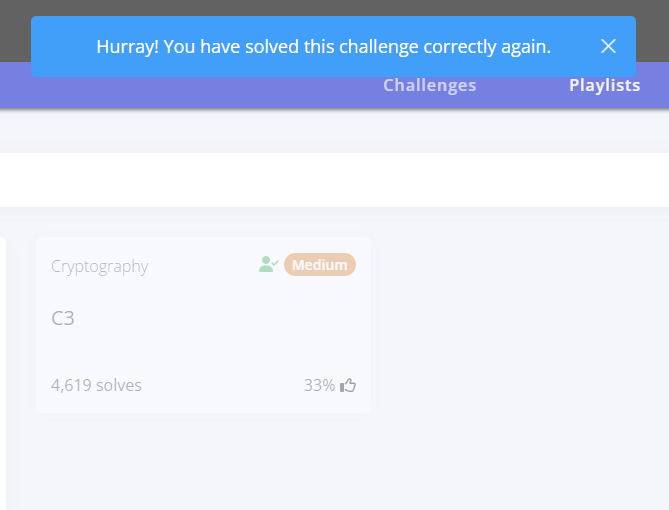

In [216]:

from IPython.display import Image, display, Markdown
import os

fname = "img5.png"
if os.path.exists(fname):
    display(Markdown("### Imagen 1"))
    display(Image(fname))
else:
    print(f"No se encontró {fname}. Ejecutá la celda de subida y asegurate de haber subido al menos 1 imagen.")


# Ejercicio 2 — EASY ´PEASY





### Método 1 — Alineamiento exacto (paso a paso)
1) Leer banner y extraer `enc_flag` (y su longitud L).  
2) Avanzar el puntero con `KEY_LEN - L`.  
3) Enviar `L` bytes conocidos para forzar uso de `key[0:L]`.  
4) Recuperar `key[0:L]` y descifrar `enc_flag` → flag.


In [217]:
import socket, re, binascii, time

HOST = "mercury.picoctf.net"
PORT = 58913
KEY_LEN = 50000

def recv_until_prompt(sock):
    buf = b""
    sock.settimeout(2.0)
    while True:
        part = sock.recv(8192)
        if not part:
            break
        buf += part
        if b"What data would you like to encrypt?" in buf:
            break
    return buf.decode('utf-8', errors='replace')


In [218]:
s = socket.create_connection((HOST, PORT), timeout=10)
banner = recv_until_prompt(s)

m = re.search(r"This is the encrypted flag!\n([0-9a-fA-F]+)\n", banner)
assert m, "No se encontró el encrypted flag en el banner"
enc_flag = binascii.unhexlify(m.group(1).strip())
L = len(enc_flag)

print("Longitud enc_flag (bytes) =", L)


Longitud enc_flag (bytes) = 32


In [219]:
advance = KEY_LEN - L
s.sendall( ("B"*advance + "\n").encode('utf-8') )
_ = recv_until_prompt(s)
print("Avance realizado:", advance)


Avance realizado: 49968


In [220]:
probe_char = 'C'
s.sendall( (probe_char*L + "\n").encode('utf-8') )
resp = recv_until_prompt(s)
s.close()

m2 = re.search(r"Here ya go!\n([0-9a-fA-F]+)\n", resp)
assert m2, "No pude parsear el ciphertext final"
enc_probe = binascii.unhexlify(m2.group(1).strip())

ui = (probe_char*L).encode('utf-8')
ks0 = bytes(ci ^ ui[i] for i,ci in enumerate(enc_probe))    # key[0:L]
flag = bytes(efi ^ ks0[i] for i,efi in enumerate(enc_flag)) # descifrar

try:
    flag_str = flag.decode('utf-8')
except UnicodeDecodeError:
    flag_str = flag.decode('latin-1')

final_flag = flag_str if flag_str.startswith("picoCTF{") else f"picoCTF{{{flag_str}}}"
print("Flag:", final_flag)


Flag: picoCTF{35ecb423b3b43472c35cc2f41011c6d2}


### Método 2 — Avance por bloques (chunked)
1) Leer banner y extraer `enc_flag` (L).  
2) Avanzar `key_location` en **bloques pequeños** cuya suma sea `KEY_LEN - L`.  
3) Enviar `L` bytes conocidos; obtener `key[0:L]` y descifrar `enc_flag`.


In [221]:
import socket, re, binascii, time

HOST = "mercury.picoctf.net"
PORT = 58913
KEY_LEN = 50000

def recv_until_prompt(sock):
    buf = b""
    sock.settimeout(2.0)
    while True:
        part = sock.recv(8192)
        if not part:
            break
        buf += part
        if b"What data would you like to encrypt?" in buf:
            break
    return buf.decode('utf-8', errors='replace')


In [222]:
s2 = socket.create_connection((HOST, PORT), timeout=10)
banner2 = recv_until_prompt(s2)

m = re.search(r"This is the encrypted flag!\n([0-9a-fA-F]+)\n", banner2)
assert m, "No se encontró el encrypted flag en el banner"
enc_flag2 = binascii.unhexlify(m.group(1).strip())
L2 = len(enc_flag2)

print("Longitud enc_flag (bytes) =", L2)


Longitud enc_flag (bytes) = 32


In [223]:
remaining = KEY_LEN - L2
chunk_size = 4000
sent = 0
while sent < remaining:
    take = min(chunk_size, remaining - sent)
    s2.sendall( ("X"*take + "\n").encode('utf-8') )
    _ = recv_until_prompt(s2)
    sent += take
    time.sleep(0.01)
print("Avance por bloques total:", sent)


Avance por bloques total: 49968


In [224]:
probe_char = 'Z'
s2.sendall( (probe_char*L2 + "\n").encode('utf-8') )
resp2 = recv_until_prompt(s2)
s2.close()

m2 = re.search(r"Here ya go!\n([0-9a-fA-F]+)\n", resp2)
assert m2, "No pude parsear el ciphertext final"
enc_probe2 = binascii.unhexlify(m2.group(1).strip())

ui2 = (probe_char*L2).encode('utf-8')
ks0_2 = bytes(ci ^ ui2[i] for i,ci in enumerate(enc_probe2))
flag2 = bytes(efi ^ ks0_2[i] for i,efi in enumerate(enc_flag2))

try:
    flag2_str = flag2.decode('utf-8')
except UnicodeDecodeError:
    flag2_str = flag2.decode('latin-1')

final_flag2 = flag2_str if flag2_str.startswith("picoCTF{") else f"picoCTF{{{flag2_str}}}"
print("Flag (método 2):", final_flag2)


Flag (método 2): picoCTF{35ecb423b3b43472c35cc2f41011c6d2}


#Evidencia

### Imagen 1

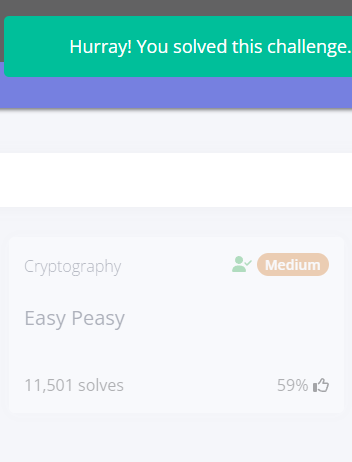

In [225]:

from IPython.display import Image, display, Markdown
import os

fname = "img4.png"
if os.path.exists(fname):
    display(Markdown("### Imagen 1"))
    display(Image(fname))
else:
    print(f"No se encontró {fname}. Ejecutá la celda de subida y asegurate de haber subido al menos 1 imagen.")

# Ejercicio 3 — New Caesar

**Descripción del reto:**
Se nos entrega un script `new_caesar.py` y un ciphertext.  
La tarea es romper este cifrado no estándar y recuperar la flag.

**Idea general (Método A):**
1. Revisamos `new_caesar.py` y entendemos que hace un Caesar modificado con un alfabeto de 16 letras (`a..p`) y encoding tipo base16.  
2. Para descifrar probamos todas las claves posibles (`a..p`).  
3. Convertimos las letras alfabéticas de nuevo a bytes.  
4. Inspeccionamos cuál produce una cadena legible (la flag).  


In [226]:
# Helpers: mapping y funciones de descifrado
ct = "lkmjkemjmkiekeijiiigljlhilihliikiliginliljimiklligljiflhiniiiniiihlhilimlhijil"

alphabet = "abcdefghijklmnop"
alpha_index = {c:i for i,c in enumerate(alphabet)}

def unshift_char_sub(c_enc, k):
    return alphabet[(alpha_index[c_enc] - alpha_index[k]) % len(alphabet)]

def b16_to_bytes(b16str):
    if len(b16str) % 2 == 1:
        return None
    out = bytearray()
    for i in range(0, len(b16str), 2):
        hi = alpha_index[b16str[i]]
        lo = alpha_index[b16str[i+1]]
        out.append((hi << 4) | lo)
    return bytes(out)


## Exploración de claves
Probamos todas las claves (`a..p`) y observamos previews.  
Buscamos aquella que devuelva un texto legible en ASCII.


In [227]:
for key in alphabet:
    b16 = ''.join(unshift_char_sub(c, key) for c in ct)
    raw = b16_to_bytes(b16)
    if not raw:
        continue
    preview = raw.decode('utf-8', errors='replace')[:50]
    print(f"key={key}: {preview}")


key=a: �ɤ�ʄ���������������������������������
key=b: �����s�xwu��zv�yzu|��{y�u�t�|w|wv�z{�xz
key=c: �����b�gfd��ie�hidk��jh�d�c�kfkfe�ij�gi
key=d: ��q��QqVUS��XT�WXSZ��YW�S�R�ZUZUT�XY�VX
key=e: v�`��@`EDBusGCtFGBItuHFwBuAsIDIDCsGHsEG
key=f: et_tu?_431db62c5618cd75f1d0b83832b67b46
key=g: TcNcd.N#" SQ%!R$% 'RS&$U S/Q'"'"!Q%&Q#%
key=h: CR=RS=B@AABDB@@@
?  ??
key=j: !001���� .��/����/ ��"� �.�����.��.��
key=k: /
/ �
����������������������
�� �����������
����������������������������������
key=n: ������׼���꾺뽾���쿽��갻���꾿꼾
key=o: �����ƫ���٭�ڬ����ۮ�ݨۧٯ����٭�٫�
key=p: �ڵ�ە�����Ȝ�ɛ����ʝ�̗ʖȞ����Ȝ�Ț�


## Decodificación completa
Usamos la clave prometedora (`f`/`l`) para reconstruir el texto completo
y envolvemos con `picoCTF{...}` si no está incluido.


In [228]:
import re

# Decodificar con la clave seleccionada
key = 'f'
b16 = ''.join(unshift_char_sub(c, key) for c in ct)
raw = b16_to_bytes(b16)
text = raw.decode('utf-8', errors='replace')

# Construir flag candidata
flag = text if text.startswith("picoCTF{") else f"picoCTF{{{text}}}"
print("Flag final:", flag)


Flag final: picoCTF{et_tu?_431db62c5618cd75f1d0b83832b67b46}


# Método 2 — detección automática por puntuación

automatizar la búsqueda de la mejor clave (a..p) usando una función de puntuación que priorice texto legible.  
Ventaja: reproducible, escalable y no requiere inspección manual de 16 líneas.


In [229]:
# Helpers y funciones de scoring
ct = "lkmjkemjmkiekeijiiigljlhilihliikiliginliljimiklligljiflhiniiiniiihlhilimlhijil"
alphabet = "abcdefghijklmnop"
alpha_index = {c:i for i,c in enumerate(alphabet)}

def unshift_with_key(ct, key):
    return ''.join(alphabet[(alpha_index[c] - alpha_index[key]) % 16] for c in ct)

def b16_to_bytes(b16str):
    if len(b16str) % 2 == 1:
        return None
    out = bytearray()
    for i in range(0, len(b16str), 2):
        hi = alpha_index[b16str[i]]
        lo = alpha_index[b16str[i+1]]
        out.append((hi << 4) | lo)
    return bytes(out)

def printable_ratio(bs):
    if not bs:
        return 0.0
    good = sum(1 for b in bs if 32 <= b < 127)
    return good / len(bs)


EN_FREQ = {
    'e': 12.0,'t':9.1,'a':8.2,'o':7.5,'i':7.0,'n':6.7,'s':6.3,'r':6.0,'h':6.1,'l':4.0,'d':4.3,'c':2.8
}
def english_score(text):
    text = text.lower()
    score = 0.0
    for ch, wt in EN_FREQ.items():
        score += text.count(ch) * wt
    return score / (len(text) + 1)

def key_score(key):
    b16 = unshift_with_key(ct, key)
    raw = b16_to_bytes(b16)
    if raw is None:
        return (key, -1.0, 0.0, "")
    pr = printable_ratio(raw)
    try:
        text = raw.decode('utf-8', errors='replace')
    except:
        text = raw.decode('latin-1', errors='replace')
    es = english_score(text)
    combined = pr * 2.0 + es * 0.02
    return (key, combined, pr, text)


In [230]:
# Calcular scores para todas las claves y ordenar
results = [key_score(k) for k in alphabet]
results_sorted = sorted(results, key=lambda x: x[1], reverse=True)

print("Top candidates (key, score, printable_ratio):")
for key, combined, pr, text in results_sorted[:6]:
    preview = text[:200].replace("\n","\\n")
    print(f"key={key}  score={combined:.4f}  printable={pr:.3f}  preview={preview}")


Top candidates (key, score, printable_ratio):
key=g  score=2.0316  printable=1.000  preview=TcNcd.N#" SQ%!R$% 'RS&$U S/Q'"'"!Q%&Q#%
key=f  score=2.0244  printable=1.000  preview=et_tu?_431db62c5618cd75f1d0b83832b67b46
key=e  score=1.9098  printable=0.923  preview=v�`��@`EDBusGCtFGBItuHFwBuAsIDIDCsGHsEG
key=d  score=1.3036  printable=0.641  preview=��q��QqVUS��XT�WXSZ��YW�S�R�ZUZUT�XY�VX
key=c  score=1.2194  printable=0.590  preview=�����b�gfd��ie�hidk��jh�d�c�kfkfe�ij�gi
key=b  score=1.1872  printable=0.590  preview=�����s�xwu��zv�yzu|��{y�u�t�|w|wv�z{�xz


In [231]:
import re

N = 3  # número de candidatos superiores a revisar
for key, combined, pr, text in results_sorted[:N]:
    print("=== key:", key, "score:", combined, "printable:", pr, "===\n")

    b16 = unshift_with_key(ct, key)
    raw = b16_to_bytes(b16)
    if raw is None:
        print("Invalid b16 length\n")
        continue
    decoded = raw.decode('utf-8', errors='replace')
    print(decoded)
    m = re.search(r'picoCTF\{[^}]+\}', decoded)
    if m:
        print("\n**FLAG DETECTADA**:", m.group(0))
    else:
        print("\nNo picoCTF{...} detectado en este candidato\n")


=== key: g score: 2.03165 printable: 1.0 ===

TcNcd.N#" SQ%!R$% 'RS&$U S/Q'"'"!Q%&Q#%

No picoCTF{...} detectado en este candidato

=== key: f score: 2.02435 printable: 1.0 ===

et_tu?_431db62c5618cd75f1d0b83832b67b46

No picoCTF{...} detectado en este candidato

=== key: e score: 1.9098038461538462 printable: 0.9230769230769231 ===

v�`��@`EDBusGCtFGBItuHFwBuAsIDIDCsGHsEG

No picoCTF{...} detectado en este candidato



In [232]:

flag_candidate = "picoCTF{et_tu?_431db62c5618cd75f1d0b83832b67b46}"

with open("flag_new_caesar_method2.txt","w",encoding="utf-8") as f:
    f.write(flag_candidate)
print("Flag guardada en flag_new_caesar_method2.txt")
print("Flag:", flag_candidate)


Flag guardada en flag_new_caesar_method2.txt
Flag: picoCTF{et_tu?_431db62c5618cd75f1d0b83832b67b46}


#Evidencia

### Imagen 1

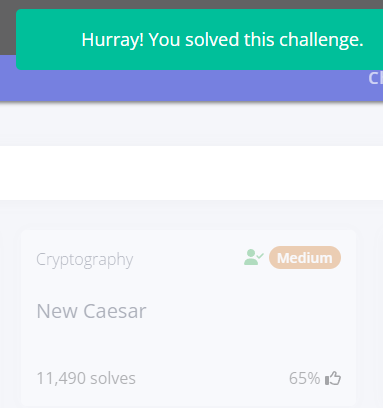

In [233]:

from IPython.display import Image, display, Markdown
import os

fname = "img3.png"
if os.path.exists(fname):
    display(Markdown("### Imagen 1"))
    display(Image(fname))
else:
    print(f"No se encontró {fname}. Ejecutá la celda de subida y asegurate de haber subido al menos 1 imagen.")

#EJERCICIO 4 rotation

El primer enfoque consistE en aplicar un ataque de fuerza bruta clásico al cifrado César.  
Se implementó una función que prueba todas las rotaciones posibles (0–25) y se revisó manualmente cuál produce un texto legible con el formato típico de flag `{...}`.  


## Lectura del archivo cifrado

Se carga el archivo `encrypted.txt` y se muestra su contenido crudo para inspección inicial.


In [234]:
with open("encrypted.txt", "r") as f:
    data = f.read().strip()

print("Contenido cifrado:", data)


Contenido cifrado: xqkwKBN{z0bib1wv_l3kzgxb3l_429in00n}


## Definición de la función de rotación César

Se implementa una función para desplazar letras con un valor `n` dentro del alfabeto (mayúsculas y minúsculas).


In [235]:
def caesar_shift(s, n):
    result = []
    for ch in s:
        if 'a' <= ch <= 'z':
            result.append(chr((ord(ch) - 97 + n) % 26 + 97))
        elif 'A' <= ch <= 'Z':
            result.append(chr((ord(ch) - 65 + n) % 26 + 65))
        else:
            result.append(ch)
    return ''.join(result)


## Prueba de todas las rotaciones posibles (0–25)

Se recorren todos los posibles desplazamientos y se imprime el resultado. El texto legible con formato de flag se identifica entre estas salidas.


In [236]:
for n in range(26):
    print(f"Shift {n:2d}: {caesar_shift(data, n)}")


Shift  0: xqkwKBN{z0bib1wv_l3kzgxb3l_429in00n}
Shift  1: yrlxLCO{a0cjc1xw_m3lahyc3m_429jo00o}
Shift  2: zsmyMDP{b0dkd1yx_n3mbizd3n_429kp00p}
Shift  3: atnzNEQ{c0ele1zy_o3ncjae3o_429lq00q}
Shift  4: buoaOFR{d0fmf1az_p3odkbf3p_429mr00r}
Shift  5: cvpbPGS{e0gng1ba_q3pelcg3q_429ns00s}
Shift  6: dwqcQHT{f0hoh1cb_r3qfmdh3r_429ot00t}
Shift  7: exrdRIU{g0ipi1dc_s3rgnei3s_429pu00u}
Shift  8: fyseSJV{h0jqj1ed_t3shofj3t_429qv00v}
Shift  9: gztfTKW{i0krk1fe_u3tipgk3u_429rw00w}
Shift 10: haugULX{j0lsl1gf_v3ujqhl3v_429sx00x}
Shift 11: ibvhVMY{k0mtm1hg_w3vkrim3w_429ty00y}
Shift 12: jcwiWNZ{l0nun1ih_x3wlsjn3x_429uz00z}
Shift 13: kdxjXOA{m0ovo1ji_y3xmtko3y_429va00a}
Shift 14: leykYPB{n0pwp1kj_z3ynulp3z_429wb00b}
Shift 15: mfzlZQC{o0qxq1lk_a3zovmq3a_429xc00c}
Shift 16: ngamARD{p0ryr1ml_b3apwnr3b_429yd00d}
Shift 17: ohbnBSE{q0szs1nm_c3bqxos3c_429ze00e}
Shift 18: picoCTF{r0tat1on_d3crypt3d_429af00f}
Shift 19: qjdpDUG{s0ubu1po_e3dszqu3e_429bg00g}
Shift 20: rkeqEVH{t0vcv1qp_f3etarv3f_429ch00h}
Shift 21: slf

## Selección de la rotación correcta

Una vez identificada la rotación que devuelve un texto claro en inglés y con flag entre llaves, se imprime directamente esa salida como resultado final.


In [237]:

shift_correcto = 18
print("Flag:", caesar_shift(data, shift_correcto))


Flag: picoCTF{r0tat1on_d3crypt3d_429af00f}


## Método B — Heurística mejorada para selección automática

En este enfoque se prueba cada rotación César, pero en lugar de revisar manualmente todas, se define una heurística más estricta:
- La cadena debe contener llaves `{}`.
- Se premia si aparece la subcadena `CTF`.
- Se puntúa mejor si cumple el patrón `palabra{contenido}`.
El sistema elige la rotación con mayor puntuación y devuelve directamente la flag.


In [238]:
import re

def score_candidate(s):
    score = 0
    if '{' in s and '}' in s:
        score += 5
    if "CTF" in s:  # clave: detectar presencia de 'CTF'
        score += 10
    if re.search(r'[A-Za-z0-9_]+\{[^}]+\}', s):
        score += 5
    alpha_num = sum(c.isalnum() or c in "_{}" for c in s)
    score += alpha_num / max(len(s),1) * 5
    return score

best_score, best_shift, best_text = -1, None, None
for n in range(26):
    out = caesar_shift(data, n)
    sc = score_candidate(out)
    if sc > best_score:
        best_score, best_shift, best_text = sc, n, out

print("Mejor rotación detectada:", best_shift)
print("Flag:", best_text)


Mejor rotación detectada: 18
Flag: picoCTF{r0tat1on_d3crypt3d_429af00f}


#Evidencia

### Imagen 1

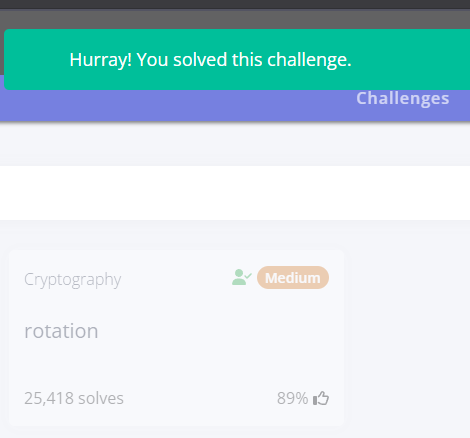

In [239]:

from IPython.display import Image, display, Markdown
import os

fname = "img2.png"
if os.path.exists(fname):
    display(Markdown("### Imagen 1"))
    display(Image(fname))
else:
    print(f"No se encontró {fname}. Ejecutá la celda de subida y asegurate de haber subido al menos 1 imagen.")

# Ejercicio5 — Vigenère

Se presentan dos métodos:
- **Método A:** descifrado directo con la clave conocida `CYLAB`.
- **Método B:** crib-drag (ataque por crib) para derivar fragmentos de clave y generar candidatos.


## Método A — Descifrado con clave conocida ("CYLAB")

Lectura del ciphertext, descifrado con la clave `CYLAB`, guardado del resultado y cálculo del SHA-256. Se muestra un preview enmascarado; la revelación completa está controlada por `REVEAL`.


In [240]:
# Método A: descifrado con clave conocida
import re, hashlib, os

def vigenere_decrypt(ciphertext, key):
    res = []
    key_shifts = [(ord(k.upper()) - ord('A')) for k in key]
    ki = 0
    for ch in ciphertext:
        if 'A' <= ch <= 'Z':
            shift = key_shifts[ki % len(key_shifts)]
            res.append(chr((ord(ch) - ord('A') - shift) % 26 + ord('A')))
            ki += 1
        elif 'a' <= ch <= 'z':
            shift = key_shifts[ki % len(key_shifts)]
            res.append(chr((ord(ch) - ord('a') - shift) % 26 + ord('a')))
            ki += 1
        else:
            res.append(ch)
    return ''.join(res)

# leer ciphertext
with open("cipher.txt", "r", encoding="utf-8", errors="ignore") as f:
    cipher = f.read().strip()

# descifrar con clave conocida
key = "CYLAB"
plain_A = vigenere_decrypt(cipher, key)

# guardar resultado oficial para Método A (nombre consistente)
outA = "decrypted_with_CYLAB.txt"
with open(outA, "w", encoding="utf-8") as fo:
    fo.write(plain_A)

# preparar impresión enmascarada y SHA256
masked_A = re.sub(r'\{([^}]*)\}', '{[REDACTED]}', plain_A)
sha_A = hashlib.sha256(plain_A.encode("utf-8")).hexdigest()

print("Método A — Clave usada:", key)
print("Preview enmascarado:", masked_A)
print("SHA-256:", sha_A)
print("Archivo guardado:", outA)


Método A — Clave usada: CYLAB
Preview enmascarado: picoCTF{[REDACTED]}
SHA-256: c5613bc3881b4dfb28755d8e52229189caf7f8bbddd4bad874f5c64d2776274c
Archivo guardado: decrypted_with_CYLAB.txt


## Revelación controlada (Método A)



In [241]:
# Revelación consciente del Método A
REVEAL = True

if REVEAL:
    with open("decrypted_with_CYLAB.txt", "r", encoding="utf-8", errors="ignore") as f:
        print(f.read())
else:
    print("REVEAL = False -> no se imprimió el contenido completo del Método A.")


picoCTF{D0NT_US3_V1G3N3R3_C1PH3R_2951a89h}


## Método B — Crib-drag (ataque por "crib")

Alinea cribs probables (ej. "picoCTF") sobre el ciphertext para derivar fragmentos de la clave.  
Cada fragmento se usa como clave candidata repetida; se guardan archivos `crib_candidate_<crib>_<pos>_<frag>.txt` con el plaintext completo (la parte enmascarada aparece primero en el fichero).


In [242]:
# Crib-drag: generar candidatos derivados del crib y guardar resultados
import re, collections, hashlib, glob, os

def vigenere_decrypt_with_key(ciphertext, key):
    res = []
    shifts = [(ord(k.upper()) - ord('A')) for k in key]
    ki = 0
    for ch in ciphertext:
        if 'A' <= ch <= 'Z':
            shift = shifts[ki % len(shifts)]
            res.append(chr((ord(ch) - ord('A') - shift) % 26 + ord('A')))
            ki += 1
        elif 'a' <= ch <= 'z':
            shift = shifts[ki % len(shifts)]
            res.append(chr((ord(ch) - ord('a') - shift) % 26 + ord('a')))
            ki += 1
        else:
            res.append(ch)
    return ''.join(res)

def derive_key_fragment(cipher_segment, crib):
    frag = []
    for c, p in zip(cipher_segment, crib):
        if c.isalpha() and p.isalpha():
            shift = (ord(c.upper()) - ord(p.upper())) % 26
            frag.append(chr(shift + ord('A')))
        else:
            return None
    return ''.join(frag)


cribs = ["picoCTF", "pico", "CTF", "flag"]
candidates = []

for crib in cribs:
    L = len(crib)
    for pos in range(len(cipher) - L + 1):
        segment = cipher[pos:pos+L]
        key_frag = derive_key_fragment(segment, crib)
        if not key_frag:
            continue
        key_candidate = key_frag
        plain_candidate = vigenere_decrypt_with_key(cipher, key_candidate)
        masked = re.sub(r'\{([^}]*)\}', '{[REDACTED]}', plain_candidate)
        sha = hashlib.sha256(plain_candidate.encode("utf-8")).hexdigest()
        fname = f"crib_candidate_{crib}_{pos}_{key_candidate}.txt"
        with open(fname, "w", encoding="utf-8") as fh:
            fh.write(masked + "\n\n--- FULL BELOW (local only) ---\n\n")
            fh.write(plain_candidate)
        candidates.append((crib, pos, key_candidate, masked, sha, fname))

# mostrar candidatos (primera página)
print("Candidatos generados (muestra):")
for c in candidates[:30]:
    print(c[0], c[1], c[2], c[3], c[4], c[5])
print("\nNúmero total de candidatos generados:", len(candidates))
print("Archivos crib_candidate_*.txt guardados en el directorio actual.")


Candidatos generados (muestra):
picoCTF 0 CYLABCY picoCTF{[REDACTED]} 93127c1fb7833c2a5e551e40508761f185caf937b8bfde7d4358271f4bd0f953 crib_candidate_picoCTF_0_CYLABCY.txt
pico 0 CYLA picoBXS{[REDACTED]} 5d866a5d699a986e206d3733f369026ecf72f67197955ba28bd922419a2bf78b crib_candidate_pico_0_CYLA.txt
pico 1 RFMP abbzMQR{[REDACTED]} a67b684e15a2df4e6967ea2440b1384a4cb1a046db59c6671be1d22a46f4a498 crib_candidate_pico_1_RFMP.txt
pico 2 YGBH tamhFPC{[REDACTED]} 7946bf5ee0451c89010aa9a390315d62b980e4b26b10fffcb0a6c4910d586364 crib_candidate_pico_2_YGBH.txt
pico 3 ZVTP sluzEAK{[REDACTED]} 4d3dd3873041a00fd5793134c652303b6ba6b6b1bdeb614b702b5aabd96f0d14 crib_candidate_pico_3_ZVTP.txt
CTF 0 PNI ctfzQNO{[REDACTED]} c4af188800cfe188d2652d796f8b1daa87cfe93084904f7bd9c6b1491fc04e04 crib_candidate_CTF_0_PNI.txt
CTF 1 EUJ nmekJMZ{[REDACTED]} 36605f49608bdfa8b4d76bd7385dee6735003b11cda6dfcb704eb89343c70b97 crib_candidate_CTF_1_EUJ.txt
CTF 2 LVY glpdIXS{[REDACTED]} a6338a21edda9aac5b91da0f4f5724bffeb4c3

## Listado y revelación controlada de candidatos (Método B)

La siguiente celda lista todos los `crib_candidate_*.txt`


In [243]:
# Listar candidatos que contienen picoCTF y revelación controlada
files = sorted(glob.glob("crib_candidate_*.txt"))
matches = []
for i, fname in enumerate(files):
    data = open(fname, "r", encoding="utf-8", errors="ignore").read()
    finds = re.findall(r'(picoCTF\{[^}]*\})', data, flags=re.IGNORECASE)
    sha = hashlib.sha256(data.encode("utf-8")).hexdigest()
    preview = ", ".join([re.sub(r'\{([^}]*)\}', '{[REDACTED]}', f) for f in finds]) if finds else re.sub(r'\{([^}]*)\}', '{[REDACTED]}', data.strip().replace("\n"," ")[:120])
    print(f"[{i}] {fname}  |  SHA256: {sha}  |  preview: {preview}")
    if finds:
        matches.append((i, fname, sha, finds))
print()
print("Índices con ocurrencias de picoCTF:", [m[0] for m in matches])

# Control de revelación
INDEX = 0
REVEAL = True

if REVEAL:
    if 0 <= INDEX < len(files):
        print("\n--- REVELANDO:", files[INDEX], "---\n")
        print(open(files[INDEX], "r", encoding="utf-8", errors="ignore").read())
    else:
        print("Índice fuera de rango.")
else:
    print("REVEAL = False → no se imprimió el contenido completo.")


[0] crib_candidate_CTF_0_PNI.txt  |  SHA256: 27d3af80d121a71d1f11a0d3a247361adc4375a694e6a12368c498dd306ee77f  |  preview: ctfzQNO{[REDACTED]}  --- FULL BELOW (local only) ---  ctfzQNO{[REDACTED]}
[1] crib_candidate_CTF_1_EUJ.txt  |  SHA256: 296658738d21dd40ffdf8d623bb698bdd455cfe725ac3dc1fcefc22e6a0cfc5d  |  preview: nmekJMZ{[REDACTED]}  --- FULL BELOW (local only) ---  nmekJMZ{[REDACTED]}
[2] crib_candidate_CTF_2_LVY.txt  |  SHA256: 06b34322cf6d697fee40a227b43e59ebd900e17373b8ade77ed0b668ae5d4069  |  preview: glpdIXS{[REDACTED]}  --- FULL BELOW (local only) ---  glpdIXS{[REDACTED]}
[3] crib_candidate_CTF_3_MKQ.txt  |  SHA256: fdca4014ab6969e814917c23f510a7a026acce8b4df9f12251e4a866ab15f9cc  |  preview: fwxcTFR{[REDACTED]}  --- FULL BELOW (local only) ---  fwxcTFR{[REDACTED]}
[4] crib_candidate_CTF_4_BCY.txt  |  SHA256: 1b79e43f48af70e02317a0996251cce4a20330e8fd5f48bd61d29eb89a0eaa55  |  preview: qepnBXC{[REDACTED]}  --- FULL BELOW (local only) ---  qepnBXC{[REDACTED]}
[5] crib_candid

In [244]:
# === Mostrar la flag desde un archivo de envío
import os, hashlib

FILENAME = "submission_CYLAB.txt"

EXPECTED_SHA_CYLAB = "c5613bc3881b4dfb28755d8e52229189caf7f8bbddd4bad874f5c64d2776274c"
EXPECTED_SHA_CYLABCY = "93127c1fb7833c2a5e551e40508761f185caf937b8bfde7d4358271f4bd0f953"

if not os.path.exists(FILENAME):
    print("Archivo no encontrado:", FILENAME)
else:
    data = open(FILENAME, "rb").read()
    sha = hashlib.sha256(data).hexdigest()
    print("Archivo:", FILENAME)
    print("SHA-256:", sha)
    if FILENAME.lower().startswith("submission_cylab"):
        print("SHA esperada para CYLAB:", EXPECTED_SHA_CYLAB)
    elif FILENAME.lower().startswith("submission_cylabcy"):
        print("SHA esperada para CYLABCY:", EXPECTED_SHA_CYLABCY)
    if sha != EXPECTED_SHA_CYLAB and sha != EXPECTED_SHA_CYLABCY:
        print("**Aviso:** el SHA del archivo no coincide con las SHA documentadas. Revisa que estés usando el archivo correcto.")
    print("\n--- FLAG / CONTENIDO DEL ARCHIVO")

    try:
        print(data.decode("utf-8"))
    except Exception:
        print(data)




Archivo: submission_CYLAB.txt
SHA-256: c5613bc3881b4dfb28755d8e52229189caf7f8bbddd4bad874f5c64d2776274c
SHA esperada para CYLAB: c5613bc3881b4dfb28755d8e52229189caf7f8bbddd4bad874f5c64d2776274c

--- FLAG / CONTENIDO DEL ARCHIVO
picoCTF{D0NT_US3_V1G3N3R3_C1PH3R_2951a89h}


#Evidencia

### Imagen 1

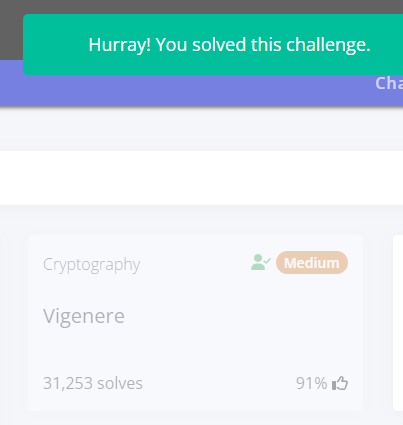

In [245]:

from IPython.display import Image, display, Markdown
import os

fname = "img1.png"
if os.path.exists(fname):
    display(Markdown("### Imagen 1"))
    display(Image(fname))
else:
    print(f"No se encontró {fname}. Ejecutá la celda de subida y asegurate de haber subido al menos 1 imagen.")